<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plataforma Edulearn

#Importando as bibliotecas

In [1]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

#Analisando as proporções de pessoas com deficiência no Brasil e no ensino superior

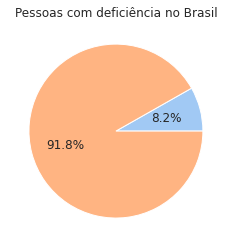

In [121]:
plt.pyplot.figure(figsize = (4,4))
brasil = [17258000,(210147125-17258000)]
colors = sns.color_palette('pastel')[0:2]
brasil = plt.pyplot.pie(brasil, colors=colors,autopct='%.1f%%')
plt.pyplot.title('Pessoas com deficiência no Brasil')
plt.pyplot.show()

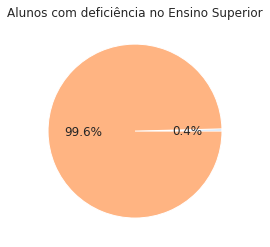

In [122]:
plt.pyplot.figure(figsize = (4,4))
brasil = [66750,(16525302-66750)]
colors = sns.color_palette('pastel')[0:2]
plt.pyplot.pie(brasil, colors=colors, autopct='%.1f%%')
plt.pyplot.title('Alunos com deficiência no Ensino Superior')
plt.pyplot.show()

# Evolução de alunos matriculados

In [4]:
evolucao_alunos = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/total_matriculados.csv', encoding='latin-1')
evolucao_alunos

,ANO,ALUNO COM DEFICIENCIA,PORCENTAGEM,ALUNO TOTAL,POPULACAO TOTAL
0,2010,25205,"0,30%",8337219,194890682
1,2011,29033,"0,32%",8961724,196603732
2,2012,34656,"0,36%",9565483,198314934
3,2013,37796,"0,38%",9929289,200004188
4,2014,45088,"0,56%",8081369,201717541
5,2015,51685,"0,46%",11187296,203475683
6,2016,49813,"0,44%",11449222,205156587
7,2017,52542,"0,45%",11589194,206804741
8,2018,59496,"0,49%",12043993,208494900
9,2019,66750,"0,41%",16425302,210147122


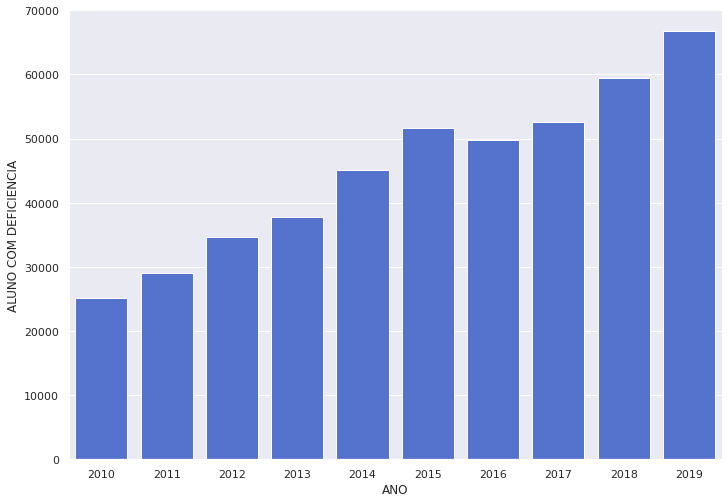

In [5]:
#Gráfico de evolução de alunos com deficiência no ensino superior
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=evolucao_alunos, x='ANO', y='ALUNO COM DEFICIENCIA',color='royalblue').figure.savefig('figura_1')

Text(0.5, 1.0, 'Evolução de alunos no ensino superior')

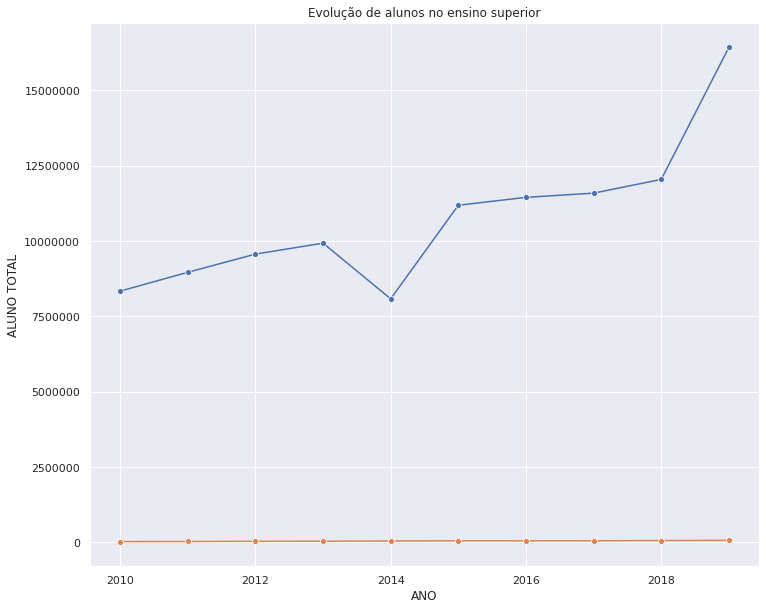

In [6]:
#Gráfico de evolução de alunos com deficiência comparado ao total de alunos
plt.figure(figsize = (12, 10))
sns.set_theme(style="darkgrid")
sns.lineplot(x="ANO", y="ALUNO TOTAL", data=evolucao_alunos, marker="o", ci="int")
sns.lineplot(x="ANO", y="ALUNO COM DEFICIENCIA", data=evolucao_alunos, marker="o", ci="int")
#sns.barplot(data=evolucao_alunos, x='ANO', y='ALUNO TOTAL',color='royalblue').figure.savefig('figura_2.png')
#sns.barplot(data=evolucao_alunos, x='ANO', y='ALUNO COM DEFICIENCIA',color='red').figure.savefig('figura_2.png')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Evolução de alunos no ensino superior')

In [7]:
#Inserindo um percentual de evolução anual no dataframe
evolucao_alunos['VALOR INICIAL'] = evolucao_alunos['ALUNO COM DEFICIENCIA'].shift()
evolucao_alunos['VALOR FINAL'] = evolucao_alunos['ALUNO COM DEFICIENCIA']
evolucao_alunos['EVOLUCAO ANUAL'] = (evolucao_alunos['VALOR FINAL'] - evolucao_alunos['VALOR INICIAL']) * 100/ evolucao_alunos['VALOR INICIAL']
evolucao_alunos

,ANO,ALUNO COM DEFICIENCIA,PORCENTAGEM,ALUNO TOTAL,POPULACAO TOTAL,VALOR INICIAL,VALOR FINAL,EVOLUCAO ANUAL
0,2010,25205,"0,30%",8337219,194890682,NaN,25205,NaN
1,2011,29033,"0,32%",8961724,196603732,25205.0,29033,15.187463
2,2012,34656,"0,36%",9565483,198314934,29033.0,34656,19.367616
3,2013,37796,"0,38%",9929289,200004188,34656.0,37796,9.060480
4,2014,45088,"0,56%",8081369,201717541,37796.0,45088,19.293047
5,2015,51685,"0,46%",11187296,203475683,45088.0,51685,14.631388
6,2016,49813,"0,44%",11449222,205156587,51685.0,49813,-3.621941
7,2017,52542,"0,45%",11589194,206804741,49813.0,52542,5.478490
8,2018,59496,"0,49%",12043993,208494900,52542.0,59496,13.235126
9,2019,66750,"0,41%",16425302,210147122,59496.0,66750,12.192416


In [8]:
#Explorando dados estatísticos do dataframe
evolucao_alunos.describe()

,ANO,ALUNO COM DEFICIENCIA,ALUNO TOTAL,POPULACAO TOTAL,VALOR INICIAL,VALOR FINAL,EVOLUCAO ANUAL
count,10.00000,10.000000,1.000000e+01,1.000000e+01,9.000000,10.000000,9.000000
mean,2014.50000,45206.400000,1.075701e+07,2.025610e+08,42812.666667,45206.400000,11.647121
std,3.02765,13388.209051,2.437782e+06,5.141812e+06,11712.711791,13388.209051,7.247518
min,2010.00000,25205.000000,8.081369e+06,1.948907e+08,25205.000000,25205.000000,-3.621941
25%,2012.25000,35441.000000,9.112664e+06,1.987372e+08,34656.000000,35441.000000,9.060480
50%,2014.50000,47450.500000,1.055829e+07,2.025966e+08,45088.000000,47450.500000,13.235126
75%,2016.75000,52327.750000,1.155420e+07,2.063927e+08,51685.000000,52327.750000,15.187463
max,2019.00000,66750.000000,1.642530e+07,2.101471e+08,59496.000000,66750.000000,19.367616


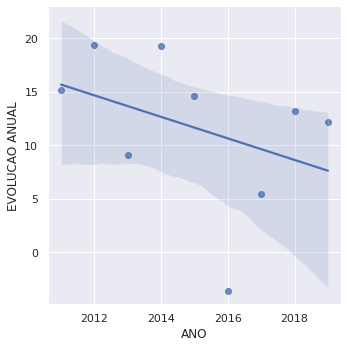

In [9]:

#Visualizando a evolução com um LinePlot
sns.lmplot(x='ANO',y='EVOLUCAO ANUAL',data=evolucao_alunos)

# Censo 2019 - IES

In [10]:
#Carregando os dados das IES
url_censo_ies_2019 = 'https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_IES_2019.CSV'
df_ies = pd.read_csv(url_censo_ies_2019, sep='|', encoding='latin-1', usecols=['CO_IES','NO_IES','SG_IES','TP_CATEGORIA_ADMINISTRATIVA','TP_ORGANIZACAO_ACADEMICA','CO_REGIAO','CO_UF','CO_MUNICIPIO'])
df_ies.head()

,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF,CO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31,3146107


In [11]:
#Renomeando as colunas
df_ies = df_ies.rename(columns={
    'CO_IES':'CODIGO_IES',
    'NO_IES':'NOME_IES',
    'SG_IES':'SIGLA_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'TIPO_CATEGORIA_ADM',
    'TP_ORGANIZACAO_ACADEMICA':'TIPO_ORG_ACADEMICA',
    'CO_REGIAO':'REGIAO',
    'CO_UF':'UF',
    'CO_MUNICIPIO':'CODIGO_MUNICIPIO'
})
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31,3146107


In [12]:
#Substituindo o código pelo nome das unidades federativas
uf = {
    '11':'Rondônia',
    '12':'Acre',
    '13':'Amazonas',
    '14':'Roraima',
    '15':'Pará',
    '16':'Amapá',
    '17':'Tocantins',
    '21':'Maranhão',
    '22':'Piauí',
    '23':'Ceará',
    '24':'Rio Grande do Norte',
    '25':'Paraíba',
    '26':'Pernambuco',
    '27':'Alagoas',
    '28':'Sergipe',
    '29':'Bahia',
    '31':'Minas Gerais',
    '32':'Espírito Santo',
    '33':'Rio de Janeiro',
    '35':'São Paulo',
    '41':'Paraná',
    '42':'Santa Catarina',
    '43':'Rio Grande do Sul',
    '50':'Mato Grosso do Sul',
    '51':'Mato Grosso',
    '52':'Goiás',
    '53':'Distrito Federal',
}
df_ies = df_ies.astype({'UF':str})
df_ies.UF = df_ies.UF.map(uf)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,Minas Gerais,3146107


In [13]:
#Substituindo o código pelo nome das regiões
regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}
df_ies = df_ies.astype({'REGIAO':str})
df_ies.REGIAO = df_ies.REGIAO.map(regiao)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,Sudeste,Minas Gerais,3146107


In [14]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_ies = df_ies.astype({'TIPO_CATEGORIA_ADM':str})
df_ies.TIPO_CATEGORIA_ADM = df_ies.TIPO_CATEGORIA_ADM.map(categoria_adm)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,1,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,1,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,1,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,1,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,1,Sudeste,Minas Gerais,3146107


In [15]:
#Substituindo o código pelo tipo de organização acadêmica
org_academica = {
    '1':'Universidade',
    '2':'Centro Universitário',
    '3':'Faculdade',
    '4':'Instituto Federal de Educação, Ciência e Tecnologia',                               
    '5':'Centro Federal de Educação Tecnológica',
}
df_ies = df_ies.astype({'TIPO_ORG_ACADEMICA':str})
df_ies.TIPO_ORG_ACADEMICA = df_ies.TIPO_ORG_ACADEMICA.map(org_academica)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,Universidade,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,Universidade,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,Universidade,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,Universidade,Sudeste,Minas Gerais,3146107


## Censo 2019 - Cursos

In [16]:
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['CO_IES','CO_CURSO','NO_CURSO','CO_CINE_ROTULO','TP_SITUACAO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA'])
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,1,0421D01,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,1,0311E01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,1,0732E01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,1,0113P01,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,1,0923S01,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
#Reduzindo os dados de 'CO_CINE_ROTULO' apenas para a grande área
def grande_area(row):
  return row['CO_CINE_ROTULO'][0:2]
df_curso['CO_CINE_ROTULO'] = df_curso.apply(grande_area, axis=1)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,1,04,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,1,03,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,1,07,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,1,01,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,1,09,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
#Substituindo o código pela área de formação geral, conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco
area_formacao = {
    '01':'Educação',
    '02':'Humanidades e Artes',
    '03':'Ciências Sociais, Negócios e Direito',
    '04':'Ciências, Matemática e Computação',
    '05':'Engenharia, Produção e Construção',
    '06':'Agricultura e Veterinária',
    '07':'Saúde e Bem Estar Social',
    '08':'Serviços',
}
df_curso = df_curso.astype({'CO_CINE_ROTULO':str})
df_curso.CO_CINE_ROTULO = df_curso.CO_CINE_ROTULO.map(area_formacao)
df_curso.head()


,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,1,"Ciências, Matemática e Computação",1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,1,"Ciências Sociais, Negócios e Direito",1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,1,Saúde e Bem Estar Social,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,1,Educação,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,1,NaN,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
#Substituindo o código pelo tipo da situação de funcionamento do curso
tp_situacao = {
    '1':'Em atividade',
    '2':'Extinto',
    '3':'Em extinção',
}
df_curso = df_curso.astype({'TP_SITUACAO':str})
df_curso.TP_SITUACAO = df_curso.TP_SITUACAO.map(tp_situacao)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Educação,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,NaN,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
#Substituindo o código pelo tipo do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
grau_academico = {
    '1.0':'Bacharelado',
    '2.0':'Licenciatura',
    '3.0':'Tecnológico',
    '4.0':'Bacharelado e Licenciatura',
}
df_curso = df_curso.astype({'TP_GRAU_ACADEMICO':str})
df_curso.TP_GRAU_ACADEMICO = df_curso.TP_GRAU_ACADEMICO.map(grau_academico)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
#Substituindo o código pelo tipo da modalidade de ensino do curso
modalidade = {
    '1':'Presencial',
    '2':'Curso a distância',
}
df_curso = df_curso.astype({'TP_MODALIDADE_ENSINO':str})
df_curso.TP_MODALIDADE_ENSINO = df_curso.TP_MODALIDADE_ENSINO.map(modalidade)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
#Renomeando as colunas
df_curso = df_curso.rename(columns={
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'NO_CURSO':'NOME_CURSO',
    'TP_SITUACAO':'SITUACAO',
    'CO_CINE_ROTULO':'AREA_FORMACAO',
    'TP_GRAU_ACADEMICO':'TIPO_GRAU_ACADEMICO',
    'TP_MODALIDADE_ENSINO':'MODALIDADE_ENSINO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
})
df_curso.head()

,CODIGO_IES,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Unindo as informações das IES e dos cursos

In [23]:
df_curso = df_ies.join(df_curso.set_index('CODIGO_IES'), on='CODIGO_IES')
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Censo 2019 - Alunos deficientes

In [24]:
#Carregando os dados do Censo do Ensino Superior(2019), referentes aos alunos com deficiência
df_aluno = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', encoding='latin-1', usecols=['CO_CURSO','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_aluno.head()

,CO_CURSO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Exportando o dataframe para um csv para melhorar o tempo de execução de nosso código
df_curso.to_csv('curso_e_ies_2019.csv')
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Analisando a quantidade de alunos com deficiência nos cursos

In [26]:
#Contando...
def contar_alunos_com_deficiencia(row):
  #Quantidade de alunos deficientes em cada curso
  return len(df_aluno.loc[df_aluno['CO_CURSO'] == row['CODIGO_CURSO']].index)
df_curso['ALUNOS_COM_DEFICIENCIA'] = df_curso.apply(contar_alunos_com_deficiencia, axis=1)

def contar_alunos_com_deficiencia_auditiva(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_AUDITIVA'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_AUDITIVA'] = df_curso.apply(contar_alunos_com_deficiencia_auditiva, axis=1)

def contar_alunos_com_deficiencia_fisica(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_FISICA'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_FISICA'] = df_curso.apply(contar_alunos_com_deficiencia_fisica, axis=1)

def contar_alunos_com_deficiencia_intelectual(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_INTELECTUAL'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_INTELECTUAL'] = df_curso.apply(contar_alunos_com_deficiencia_intelectual, axis=1)

def contar_alunos_com_deficiencia_multipla(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_MULTIPLA'] = df_curso.apply(contar_alunos_com_deficiencia_multipla, axis=1)

def contar_alunos_com_surdez(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_SURDEZ'] == 1)].index)
df_curso['ALUNOS_COM_SURDEZ'] = df_curso.apply(contar_alunos_com_surdez, axis=1)

def contar_alunos_com_surdocegueira(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1)].index)
df_curso['ALUNOS_COM_SURDOCEGUEIRA'] = df_curso.apply(contar_alunos_com_surdocegueira, axis=1)

def contar_alunos_com_baixa_visao(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_BAIXA_VISAO'] == 1)].index)
df_curso['ALUNOS_COM_BAIXA_VISAO'] = df_curso.apply(contar_alunos_com_baixa_visao, axis=1)

def contar_alunos_com_cegueira(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 1)].index)
df_curso['ALUNOS_COM_CEGUEIRA'] = df_curso.apply(contar_alunos_com_cegueira, axis=1)

def contar_alunos_com_superdotacao(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_SUPERDOTACAO'] == 1)].index)
df_curso['ALUNOS_COM_SUPERDOTACAO'] = df_curso.apply(contar_alunos_com_superdotacao, axis=1)

def contar_alunos_com_autismo(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_AUTISMO'] == 1)].index)
df_curso['ALUNOS_COM_TGD_AUTISMO'] = df_curso.apply(contar_alunos_com_autismo, axis=1)

def contar_alunos_com_sindrome_asperger(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_SINDROME_ASPERGER'] == 1)].index)
df_curso['ALUNOS_COM_TGD_SINDROME_ASPERGER'] = df_curso.apply(contar_alunos_com_sindrome_asperger, axis=1)

def contar_alunos_com_sindrome_rett(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_SINDROME_RETT'] == 1)].index)
df_curso['ALUNOS_COM_TGD_SINDROME_RETT'] = df_curso.apply(contar_alunos_com_sindrome_rett, axis=1)

def contar_alunos_com_tgd_transtor_desintegrativo(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_TRANSTOR_DESINTEGRATIVO'] == 1)].index)
df_curso['ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO'] = df_curso.apply(contar_alunos_com_tgd_transtor_desintegrativo, axis=1)

df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,9,0,0,0,0,0,0,0,0,0,0,0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3,0,0,0,0,0,1,0,0,0,0,0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,0,0,0,0,0,0,0,0,0,0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,12,2,5,0,0,0,0,2,2,0,0,1,0,0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,6,1,0,1,0,0,0,0,0,0,0,0,0


In [28]:
#Salvando esse dataframe como arquivo csv
df_curso.to_csv('curso_com_numero_alunos.csv')

In [29]:
#Somando os dados dos alunos por tipo de deficiência
tipos_deficiencia = df_curso[['ALUNOS_COM_DEFICIENCIA_AUDITIVA','ALUNOS_COM_DEFICIENCIA_FISICA','ALUNOS_COM_DEFICIENCIA_INTELECTUAL','ALUNOS_COM_DEFICIENCIA_MULTIPLA','ALUNOS_COM_SURDEZ','ALUNOS_COM_SURDOCEGUEIRA','ALUNOS_COM_BAIXA_VISAO','ALUNOS_COM_CEGUEIRA','ALUNOS_COM_SUPERDOTACAO','ALUNOS_COM_TGD_AUTISMO','ALUNOS_COM_TGD_SINDROME_ASPERGER','ALUNOS_COM_TGD_SINDROME_RETT','ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO']].sum()
tipos_deficiencia

ALUNOS_COM_DEFICIENCIA_AUDITIVA            9144
ALUNOS_COM_DEFICIENCIA_FISICA             23089
ALUNOS_COM_DEFICIENCIA_INTELECTUAL         5605
ALUNOS_COM_DEFICIENCIA_MULTIPLA            1201
ALUNOS_COM_SURDEZ                          3459
ALUNOS_COM_SURDOCEGUEIRA                    229
ALUNOS_COM_BAIXA_VISAO                    18951
ALUNOS_COM_CEGUEIRA                        3461
ALUNOS_COM_SUPERDOTACAO                    2132
ALUNOS_COM_TGD_AUTISMO                     1211
ALUNOS_COM_TGD_SINDROME_ASPERGER            811
ALUNOS_COM_TGD_SINDROME_RETT                279
ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO      463
dtype: int64

In [30]:
#Transformando series em dataframe
df_tipos_deficiencia = pd.DataFrame(tipos_deficiencia,columns=['ALUNOS'])
df_tipos_deficiencia['TIPOS_DE_DEFICIENCIA'] = df_tipos_deficiencia.index
df_tipos_deficiencia.index = range(len(df_tipos_deficiencia.index))
df_tipos_deficiencia

,ALUNOS,TIPOS_DE_DEFICIENCIA
0,9144,ALUNOS_COM_DEFICIENCIA_AUDITIVA
1,23089,ALUNOS_COM_DEFICIENCIA_FISICA
2,5605,ALUNOS_COM_DEFICIENCIA_INTELECTUAL
3,1201,ALUNOS_COM_DEFICIENCIA_MULTIPLA
4,3459,ALUNOS_COM_SURDEZ
5,229,ALUNOS_COM_SURDOCEGUEIRA
6,18951,ALUNOS_COM_BAIXA_VISAO
7,3461,ALUNOS_COM_CEGUEIRA
8,2132,ALUNOS_COM_SUPERDOTACAO
9,1211,ALUNOS_COM_TGD_AUTISMO


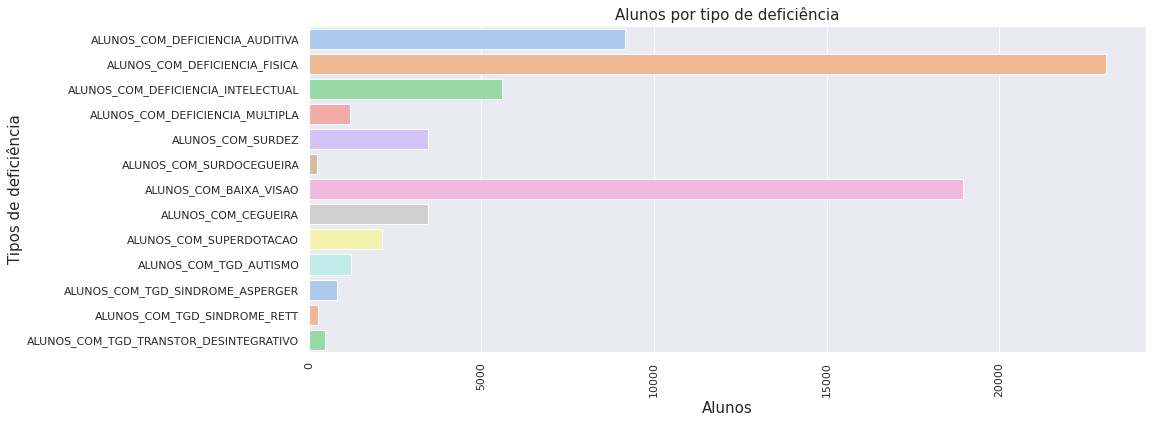

In [31]:
#Visualizando os tipos de deficiência dos alunos em  2019
plt.figure(figsize=(15,6))
deficiencias = sns.barplot(x='ALUNOS', y='TIPOS_DE_DEFICIENCIA', data=df_tipos_deficiencia, palette='pastel')
plt.xticks(rotation=90)
deficiencias.set_title('Alunos por tipo de deficiência', fontsize = 15)
deficiencias.set_xlabel('Alunos',fontsize = 15)
deficiencias.set_ylabel('Tipos de deficiência',fontsize=15)
deficiencias.figure.savefig("figura_3.png")

In [32]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso['RECURSOS'] = df_curso.apply(contar_recursos, axis=1)
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,RECURSOS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3,0,0,0,0,0,1,0,0,0,0,0,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,0,0,0,0,0,0,0,0,0,0,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,12,2,5,0,0,0,0,2,2,0,0,1,0,0,9.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1.0


# Analisando os tipos de deficiência por IES

In [33]:
#Filtrando apenas as IES públicas
df_curso_e_ies_publico = df_curso.loc[(df_curso['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]
df_curso_e_ies_publico.head()
            

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,RECURSOS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3,0,0,0,0,0,1,0,0,0,0,0,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,0,0,0,0,0,0,0,0,0,0,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,12,2,5,0,0,0,0,2,2,0,0,1,0,0,9.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1.0


In [34]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

SIGLA_IES
AMAN          2
CEFET/MG     15
CEFET/RJ     20
EEP/FUMEP     0
EG           11
             ..
USJ           0
USP          85
UTFPR        79
UVA          75
UnirG        10
Name: ALUNOS_COM_DEFICIENCIA, Length: 268, dtype: int64

In [35]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [36]:
#Visualizando o dataframe com filtro da UFRPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFRPE']

,ALUNOS_COM_DEFICIENCIA,SIGLA_IES
217,207,UFRPE


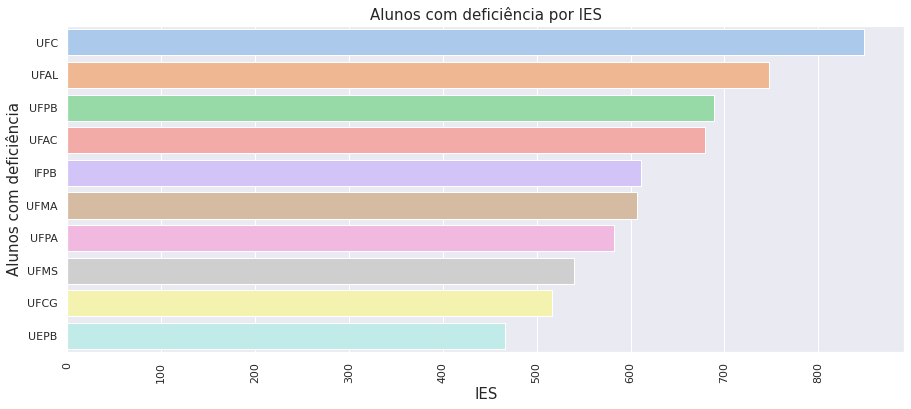

In [37]:
#Visualizando 
plt.figure(figsize=(15,6))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='pastel')
plt.xticks(rotation=90)
pcd_ies_publica_plot.set_title('Alunos com deficiência por IES', fontsize = 15)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 15)
pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=15)
pcd_ies_publica_plot.figure.savefig("figura_4.png")

#Análise da relação de alunos com deficiência e recursos disponibilizados pelas IES

In [38]:
#Agrupando os recursos disponibilizados por IES
relacao = df_curso.groupby(['SIGLA_IES'])['RECURSOS'].sum()
relacao.head()

SIGLA_IES
-                 126.0
28 de Agosto        0.0
ADJETIVO-CETEP      3.0
AEMS                0.0
AES                 1.0
Name: RECURSOS, dtype: float64

In [39]:
#Transformando em um dataframe
df_recursos_ies = pd.DataFrame(relacao,columns=['RECURSOS'])
df_recursos_ies['SIGLA_IES'] = df_recursos_ies.index
df_recursos_ies.index = range(len(df_recursos_ies.index))
df_recursos_ies.sort_values(by='RECURSOS', ascending=False, inplace=True)

In [40]:
#Unindo as informações sobre recursos nas IES
df_recursos = df_recursos_ies.join(df_pcd_ies_publica.set_index('SIGLA_IES'), on='SIGLA_IES')
df_recursos.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)
df_recursos.head()

,RECURSOS,SIGLA_IES,ALUNOS_COM_DEFICIENCIA
1474,472.0,UFC,849.0
1471,430.0,UFAL,747.0
1495,1374.0,UFPB,689.0
1470,161.0,UFAC,679.0
1239,435.0,IFPB,611.0


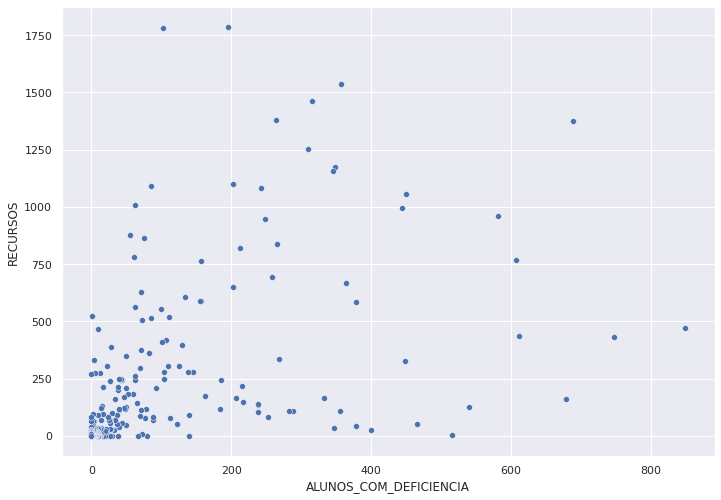

In [41]:
#Visualizando a relação alunos com deficiência e recursos disponíveis pelas IES públicas
relacao_plot = sns.scatterplot(x='ALUNOS_COM_DEFICIENCIA', y='RECURSOS', data=df_recursos)
relacao_plot.figure.savefig("figura_5.png")

Pelo gráfico acima percebemos que não conseguimos enxergar uma relação entre a quantidade de recursos ofertados com a quantidades de alunos com deficiência nas IES de ensino público.

Na tentativa de visualizar algum padrão de comportamento entre os dados existentes, divideremos essa análise por tipo de categoria administrativa.

---



In [42]:
#Inserindo os gráficos Catplot para visualização de dados categóricos
df_recursos_ies.head()

,RECURSOS,SIGLA_IES
1693,10207.0,UNIP
1542,3005.0,UNESA
1689,2547.0,UNINOVE
1430,2172.0,UAM
1019,2076.0,FMU


In [43]:
#Recebendo mais informações sobre os recursos das IES
#df_recursos_ies = df_recursos_ies.join(df_curso_e_ies_publico.set_index('SIGLA_IES'), on='SIGLA_IES')
#df_recursos_ies.head()

In [44]:
df_curso_e_ies_publico.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,RECURSOS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,"Ciências, Matemática e Computação",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Negócios e Direito",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3,0,0,0,0,0,1,0,0,0,0,0,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Saúde e Bem Estar Social,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,0,0,0,0,0,0,0,0,0,0,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,12,2,5,0,0,0,0,2,2,0,0,1,0,0,9.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,NaN,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1.0


Em seguida, reduzimos os dados a fim de analisar o comportamento apenas das IES Público Federais.


In [45]:
#Inserir filtro para Público Federal, inserir filtro para Universidades

In [46]:
#Inserir gráfico catplot comparativo

#Análise dos alunos concluintes no Ensino Superior

In [47]:
import pandas as pd
#Importando os dados de concluintes de 2019
alunos_2019 = pd.read_csv('alunodeficiente_2019.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2019 = alunos_2019.loc[alunos_2019['IN_CONCLUINTE'] == 1]
alunos_2019.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
22,2019,6,74005404,3,1,1979,1,2016
34,2019,7,73973642,5,1,1977,1,2015
152,2019,100775,73966504,1,2,1997,1,2015
179,2019,116560,73961425,2,2,1991,1,2016
239,2019,1103426,73966379,3,2,1969,1,2012


In [48]:
#Importando os dados de concluintes de 2018
alunos_2018 = pd.read_csv('alunodeficiente_2018.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2018 = alunos_2018.loc[alunos_2018['IN_CONCLUINTE'] == 1]
alunos_2018.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
3,2018,1,76445978,3,2,1995,1,2014
12,2018,6,76472979,3,1,1990,1,2014
23,2018,8,76479389,2,2,1968,1,2016
57,2018,21,76484150,1,1,1993,1,2014
85,2018,22837,76495920,3,1,1995,1,2015


In [49]:
#Importando os dados de concluintes de 2017
alunos_2017 = pd.read_csv('alunodeficiente_2017.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO','NU_ANO_CENSO'])
alunos_2017 = alunos_2017.loc[alunos_2017['IN_CONCLUINTE'] == 1]
alunos_2017.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
4,2017,2,48734293,1,1,1989,1,2014
48,2017,41673,48741262,3,1,1975,1,2014
99,2017,117004,48739644,3,2,1990,1,2012
119,2017,1103426,48765021,2,2,1982,1,2012
156,2017,1205603,48754027,3,1,1989,1,2014


In [50]:
#Juntando os dados de 2017 a 2019
anos = [alunos_2019, alunos_2018, alunos_2017]
df_concluintes_parcial = pd.concat(anos)
df_concluintes_parcial.head()

,NU_ANO_CENSO,CO_CURSO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,IN_CONCLUINTE,NU_ANO_INGRESSO
22,2019,6,74005404,3,1,1979,1,2016
34,2019,7,73973642,5,1,1977,1,2015
152,2019,100775,73966504,1,2,1997,1,2015
179,2019,116560,73961425,2,2,1991,1,2016
239,2019,1103426,73966379,3,2,1969,1,2012


In [51]:
df_concluintes_parcial = df_concluintes_parcial.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'TP_COR_RACA':'RACA',
    'TP_SEXO':'GENERO',
    'NU_ANO_NASCIMENTO':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUINTE,ANO_INGRESSO
22,2019,6,74005404,3,1,1979,1,2016
34,2019,7,73973642,5,1,1977,1,2015
152,2019,100775,73966504,1,2,1997,1,2015
179,2019,116560,73961425,2,2,1991,1,2016
239,2019,1103426,73966379,3,2,1969,1,2012


In [52]:
#Importando os dados de concluintes de 2016
alunos_2016 = pd.read_csv('alunodeficiente_2016.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2016 = alunos_2016.loc[alunos_2016['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2016['NU_ANO_CENSO']=2016
alunos_2016.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
22,116,13069741,3,0,1990,1,2011,2016
25,119,13073087,1,0,1993,1,2010,2016
38,135,12381872,1,1,1989,1,2009,2016
39,135,13065287,1,1,1989,1,2010,2016
45,136,13071528,3,0,1987,1,2010,2016


In [53]:
#Importando os dados de concluintes de 2015
alunos_2015 = pd.read_csv('alunodeficiente_2015.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2015 = alunos_2015.loc[alunos_2015['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2015['NU_ANO_CENSO']=2015
alunos_2015.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
53,122200,20404275,3,1,1988,1,2011,2015
58,300151,12631680,0,0,1989,1,2008,2015
66,160,13795351,3,0,1987,1,2013,2015
67,34642,20403767,1,0,1989,1,2007,2015
80,18032,9483270,3,0,1985,1,2012,2015


In [54]:
#Importando os dados de concluintes de 2014
alunos_2014 = pd.read_csv('alunodeficiente_2014.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2014 = alunos_2014.loc[alunos_2014['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2014['NU_ANO_CENSO']=2014
alunos_2014.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
43,145,8490077,3,0,1988,1,2009,2014
64,156,8554999,3,1,1991,1,2011,2014
88,167,8446376,4,0,1991,1,2009,2014
102,303,20290999,1,1,1981,1,2010,2014
107,304,20315417,3,1,1990,1,2009,2014


In [55]:
#Importando os dados de concluintes de 2013
alunos_2013 = pd.read_csv('alunodeficiente_2013.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2013 = alunos_2013.loc[alunos_2013['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2013['NU_ANO_CENSO']=2013
alunos_2013.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
1,8,22606124,1,0,1989,1,2007,2013
33,137,8183326,0,0,1990,1,2007,2013
36,138,8204517,6,0,1980,1,1998,2013
137,300,7626956,4,0,1982,1,2008,2013
161,315,7633903,3,1,1983,1,2009,2013


In [56]:
#Importando os dados de concluintes de 2012
alunos_2012 = pd.read_csv('alunodeficiente_2012.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2012 = alunos_2012.loc[alunos_2012['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2012['NU_ANO_CENSO']=2012
alunos_2012.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
3,20477,156255,3,1,1986,1,2007,2012
5,100547,225029,1,1,1982,1,2008,2012
31,75284,11833178,6,0,1988,1,2010,2012
32,1123238,7280581,2,0,1977,1,2010,2012
47,92951,8797596,0,1,1985,1,2009,2012


In [57]:
#Importando os dados de concluintes de 2011
alunos_2011 = pd.read_csv('alunodeficiente_2011.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2011 = alunos_2011.loc[alunos_2011['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2011['NU_ANO_CENSO']=2011
alunos_2011.head()

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
1,51212,12461,6,1,1985,1,2007,2011
21,104958,16137,1,0,1978,1,2007,2011
24,85696,24160,6,1,1986,1,2006,2011
40,51277,28634,1,1,1987,1,2006,2011
43,116176,27774,1,0,1982,1,2010,2011


In [58]:
#Juntando os dados de todos os anos
anos_parcial_2 = [alunos_2016, alunos_2015, alunos_2014, alunos_2013, alunos_2012, alunos_2011]
df_concluintes_parcial_2 = pd.concat(anos_parcial_2)
df_concluintes_parcial_2

,CO_CURSO,CO_ALUNO_CURSO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,IN_CONCLUINTE,ANO_INGRESSO,NU_ANO_CENSO
22,116,13069741,3,0,1990,1,2011,2016
25,119,13073087,1,0,1993,1,2010,2016
38,135,12381872,1,1,1989,1,2009,2016
39,135,13065287,1,1,1989,1,2010,2016
45,136,13071528,3,0,1987,1,2010,2016
...,...,...,...,...,...,...,...,...
28997,90657,11802882,6,0,1986,1,2007,2011
29003,98447,13325677,6,1,1981,1,2008,2011
29005,10480,13194631,2,1,1988,1,2006,2011
29018,68048,15178374,1,1,1989,1,2008,2011


In [59]:
df_concluintes_parcial_2 = df_concluintes_parcial_2.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'CO_COR_RACA_ALUNO':'RACA',
    'IN_SEXO_ALUNO':'GENERO',
    'NU_ANO_ALUNO_NASC':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial_2.head()

,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUINTE,ANO_INGRESSO,ANO_CENSO
22,116,13069741,3,0,1990,1,2011,2016
25,119,13073087,1,0,1993,1,2010,2016
38,135,12381872,1,1,1989,1,2009,2016
39,135,13065287,1,1,1989,1,2010,2016
45,136,13071528,3,0,1987,1,2010,2016


In [60]:
#Juntando os dados de todos os anos
partes = [df_concluintes_parcial,df_concluintes_parcial_2]
df_concluintes = pd.concat(partes)
df_concluintes.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUINTE,ANO_INGRESSO
22,2019,6,74005404,3,1,1979,1,2016
34,2019,7,73973642,5,1,1977,1,2015
152,2019,100775,73966504,1,2,1997,1,2015
179,2019,116560,73961425,2,2,1991,1,2016
239,2019,1103426,73966379,3,2,1969,1,2012


In [61]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',   
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_concluintes = df_concluintes.astype({'RACA':str})
df_concluintes.RACA = df_concluintes.RACA.map(raca)
df_concluintes.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUINTE,ANO_INGRESSO
22,2019,6,74005404,Parda,1,1979,1,2016
34,2019,7,73973642,Indígena,1,1977,1,2015
152,2019,100775,73966504,Branca,2,1997,1,2015
179,2019,116560,73961425,Preta,2,1991,1,2016
239,2019,1103426,73966379,Parda,2,1969,1,2012


In [62]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_concluintes = df_concluintes.astype({'GENERO':str})
df_concluintes.GENERO = df_concluintes.GENERO.map(genero)
df_concluintes.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUINTE,ANO_INGRESSO
22,2019,6,74005404,Parda,Feminino,1979,1,2016
34,2019,7,73973642,Indígena,Feminino,1977,1,2015
152,2019,100775,73966504,Branca,Masculino,1997,1,2015
179,2019,116560,73961425,Preta,Masculino,1991,1,2016
239,2019,1103426,73966379,Parda,Masculino,1969,1,2012


In [63]:
#Inserindo a coluna Idade
df_concluintes['IDADE']=2021-df_concluintes['DATA_NASCIMENTO']
df_concluintes.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUINTE,ANO_INGRESSO,IDADE
22,2019,6,74005404,Parda,Feminino,1979,1,2016,42
34,2019,7,73973642,Indígena,Feminino,1977,1,2015,44
152,2019,100775,73966504,Branca,Masculino,1997,1,2015,24
179,2019,116560,73961425,Preta,Masculino,1991,1,2016,30
239,2019,1103426,73966379,Parda,Masculino,1969,1,2012,52


In [64]:
#Inserindo o tempo de conclusão
df_concluintes = df_concluintes.rename(columns={'CONCLUINTE':'CONCLUSÃO'})
df_concluintes['CONCLUSÃO']=df_concluintes['ANO_CENSO']
df_concluintes['TEMPO_CONCLUSÃO']=df_concluintes['CONCLUSÃO']-df_concluintes['ANO_INGRESSO']+1
df_concluintes.head()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,RACA,GENERO,DATA_NASCIMENTO,CONCLUSÃO,ANO_INGRESSO,IDADE,TEMPO_CONCLUSÃO
22,2019,6,74005404,Parda,Feminino,1979,2019,2016,42,4
34,2019,7,73973642,Indígena,Feminino,1977,2019,2015,44,5
152,2019,100775,73966504,Branca,Masculino,1997,2019,2015,24,5
179,2019,116560,73961425,Preta,Masculino,1991,2019,2016,30,4
239,2019,1103426,73966379,Parda,Masculino,1969,2019,2012,52,8


In [65]:
df_concluintes.describe()

,ANO_CENSO,CODIGO_CURSO,CODIGO_ALUNO_CURSO,DATA_NASCIMENTO,CONCLUSÃO,ANO_INGRESSO,IDADE,TEMPO_CONCLUSÃO
count,40033.000000,4.003300e+04,4.003300e+04,40033.000000,40033.000000,40033.000000,40033.000000,40033.000000
mean,2015.478905,2.854052e+05,2.416646e+07,1983.700997,2015.478905,2011.794819,37.299003,4.684086
std,2.499762,5.803838e+05,1.744576e+07,9.919700,2.499762,2.982482,9.919700,1.784711
min,2011.000000,1.000000e+00,3.170000e+02,1926.000000,2011.000000,1982.000000,21.000000,1.000000
25%,2013.000000,2.840800e+04,1.235078e+07,1978.000000,2013.000000,2010.000000,30.000000,4.000000
50%,2016.000000,8.964400e+04,1.941763e+07,1986.000000,2016.000000,2012.000000,35.000000,5.000000
75%,2018.000000,1.145640e+05,2.887949e+07,1991.000000,2018.000000,2014.000000,43.000000,6.000000
max,2019.000000,5.001412e+06,7.900380e+07,2000.000000,2019.000000,2019.000000,95.000000,34.000000


In [66]:
#Somando os concluintes por ano
#df_concluintes['CONCLUINTES']=1
#df_concluintes.head()

In [67]:
#Somando os concluintes por ano
df_concluintes_por_ano = pd.DataFrame(columns=['ANO_CENSO'])
df_concluintes_por_ano['ANO_CENSO'] = df_concluintes['ANO_CENSO'].unique()
df_concluintes_por_ano

,ANO_CENSO
0,2019
1,2018
2,2017
3,2016
4,2015
5,2014
6,2013
7,2012
8,2011


In [68]:
def contar_concluintes(row):
  df_concluintes_no_ano = df_concluintes.loc[df_concluintes['ANO_CENSO'] == row['ANO_CENSO']]
  row['CONCLUINTES'] = len(df_concluintes_no_ano.index)
  row['MEDIA_IDADE'] = df_concluintes_no_ano['IDADE'].mean()
  row['TEMPO_MEDIO']  = df_concluintes_no_ano['TEMPO_CONCLUSÃO'].mean()
  return row
df_concluintes_por_ano = df_concluintes_por_ano.apply(contar_concluintes, axis=1)
df_concluintes_por_ano = df_concluintes_por_ano.astype({'ANO_CENSO':int})
df_concluintes_por_ano = df_concluintes_por_ano.astype({'CONCLUINTES':int})
df_concluintes_por_ano

,ANO_CENSO,CONCLUINTES,MEDIA_IDADE,TEMPO_MEDIO
0,2019,5618,34.107156,4.773585
1,2018,5200,35.068462,4.781923
2,2017,5060,36.078854,4.796640
3,2016,4809,36.524433,4.838844
4,2015,5154,38.143772,4.641055
5,2014,3918,38.784839,4.492343
6,2013,3795,38.612648,4.603953
7,2012,3595,40.291238,4.631711
8,2011,2884,41.984050,4.385922


In [69]:
total_matriculados = pd.read_csv('total_matriculados.csv')
total_matriculados.head()

,ANO,ALUNO COM DEFICIENCIA,PORCENTAGEM,ALUNO TOTAL,POPULACAO TOTAL
0,2010,25205,"0,30%",8337219,194890682
1,2011,29033,"0,32%",8961724,196603732
2,2012,34656,"0,36%",9565483,198314934
3,2013,37796,"0,38%",9929289,200004188
4,2014,45088,"0,56%",8081369,201717541


In [70]:
df_concluintes_por_ano = df_concluintes_por_ano.join(total_matriculados[['ANO','ALUNO COM DEFICIENCIA']].set_index('ANO'), on='ANO_CENSO')

In [71]:
df_concluintes_por_ano = df_concluintes_por_ano.reindex(index=df_concluintes_por_ano.index[::-1])
df_concluintes_por_ano

,ANO_CENSO,CONCLUINTES,MEDIA_IDADE,TEMPO_MEDIO,ALUNO COM DEFICIENCIA
8,2011,2884,41.984050,4.385922,29033
7,2012,3595,40.291238,4.631711,34656
6,2013,3795,38.612648,4.603953,37796
5,2014,3918,38.784839,4.492343,45088
4,2015,5154,38.143772,4.641055,51685
3,2016,4809,36.524433,4.838844,49813
2,2017,5060,36.078854,4.796640,52542
1,2018,5200,35.068462,4.781923,59496
0,2019,5618,34.107156,4.773585,66750


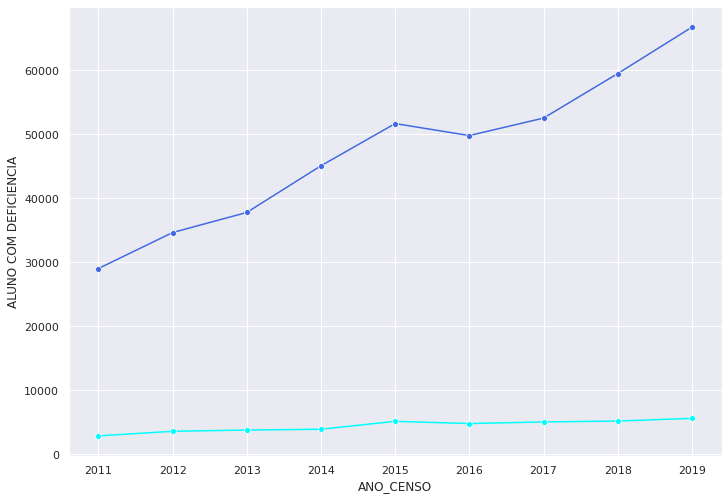

In [72]:
import seaborn as sns
import matplotlib as plt
sns.set_theme(style="darkgrid")
sns.lineplot(x="ANO_CENSO", y="ALUNO COM DEFICIENCIA", data=df_concluintes_por_ano, marker="o", color="royalblue", ci="int")
sns.lineplot(x="ANO_CENSO", y="CONCLUINTES", data=df_concluintes_por_ano, marker="o", color="cyan", ci="int")

#Analise de recursos por cursos das IES


In [73]:
#Analisando cursos por grande grupo
#Importando o csv "curso_com_numero_alunos"
df_cursos_alunos = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/curso_com_numero_alunos.csv')
df_cursos_alunos.head()

,Unnamed: 0,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO
0,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,9,0,0,0,0,0,0,0,0,0,0,0
1,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3,0,0,0,0,0,1,0,0,0,0,0
2,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,0,0,0,0,0,0,0,0,0,0
3,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,12,2,5,0,0,0,0,2,2,0,0,1,0,0
4,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,6,1,0,1,0,0,0,0,0,0,0,0,0


In [74]:
#Importando o csv "curso_com_numero_alunos"
df_cursos_alunos = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/curso_com_numero_alunos.csv')
#Filtrando para apenas IES de categoria Pública
df_cursos_pub = df_cursos_alunos.loc[(df_cursos_alunos['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_cursos_alunos['TIPO_CATEGORIA_ADM'] == 'Pública Municipal') | (df_cursos_alunos['TIPO_CATEGORIA_ADM'] == 'Pública Estadual')]

#Contando o numero de recursos por curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']
df_cursos_pub['RECURSOS'] = df_cursos_pub.apply(contar_recursos, axis=1)
df_cursos_pub.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,RECURSOS
0,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3,0,0,0,0,0,1,0,0,0,0,0,NaN
2,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,12,2,5,0,0,0,0,2,2,0,0,1,0,0,9.0
4,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1.0


In [75]:
# Criando as listas/colunas para o dataframe
lista_numeros = []
lista_recursos = []
lista_sigla_IES = []
lista_alunos_IES = []
lista_IES = df_cursos_pub['NOME_IES'].unique()  #Lista com todos os nomes das IES Públicas

for name in lista_IES:
    df = df_cursos_pub.loc[df_cursos_pub['NOME_IES'] == name].reset_index(drop=True)
    lista_numeros.append(len(df))
    lista_recursos.append(df['RECURSOS'].sum())
    lista_sigla_IES.append(df['SIGLA_IES'][0])
    lista_alunos_IES.append(df['ALUNOS_COM_DEFICIENCIA'].sum())

dicionario = {'NOME_IES':lista_IES, 'SIGLA_IES': lista_sigla_IES, 'QNT_DE_CURSOS': lista_numeros, 'QNT_DE_RECURSOS': lista_recursos, 'ALUNOS_COM_DEFICIENCIA': lista_alunos_IES}
df_cursos_por_recursos = pd.DataFrame(dicionario) #Criação do Dataframe
df_cursos_por_recursos['MEDIA_RECURSOS'] = df_cursos_por_recursos.loc[:, 'QNT_DE_RECURSOS'] / df_cursos_por_recursos.loc[:, 'QNT_DE_CURSOS']
df_cursos_por_recursos.head()

,NOME_IES,SIGLA_IES,QNT_DE_CURSOS,QNT_DE_RECURSOS,ALUNOS_COM_DEFICIENCIA,MEDIA_RECURSOS
0,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,114,164.0,333,1.438596
1,UNIVERSIDADE DE BRASÍLIA,UNB,149,1785.0,195,11.979866
2,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,116,327.0,449,2.818966
3,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,107,105.0,239,0.981308
4,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,55,607.0,134,11.036364


In [76]:
top_10 = pd.DataFrame((df_cursos_por_recursos.sort_values(['MEDIA_RECURSOS','QNT_DE_RECURSOS', 'ALUNOS_COM_DEFICIENCIA', 'QNT_DE_CURSOS'], ascending=[0,0,0,0])).head(10))
top_10

,NOME_IES,SIGLA_IES,QNT_DE_CURSOS,QNT_DE_RECURSOS,ALUNOS_COM_DEFICIENCIA,MEDIA_RECURSOS
197,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,UFRN,115,1380.0,264,12.0
89,UNIVERSIDADE ESTADUAL DE MARINGÁ,UEM,88,1056.0,450,12.0
233,UNIVERSIDADE FEDERAL DE VIÇOSA,UFV,84,1008.0,62,12.0
224,FUNDAÇÃO UNIVERSIDADE FEDERAL DO TOCANTINS,UFT,70,840.0,266,12.0
138,UNIVERSIDADE FEDERAL DE RORAIMA,UFRR,49,588.0,155,12.0
5,UNIVERSIDADE ESTADUAL DE SANTA CRUZ,UESC,39,468.0,10,12.0
194,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC,UFABC,28,336.0,269,12.0
96,FACULDADE DE FILOSOFIA CIÊNCIAS E LETRAS DE PE...,FAFIPE,8,96.0,2,12.0
119,INSTITUTO NACIONAL DE EDUCAÇÃO DE SURDOS,INES,2,24.0,400,12.0
48,Faculdade de Tecnologia Jorge Caram Sabbag,FATEC Bebedouro,1,12.0,1,12.0


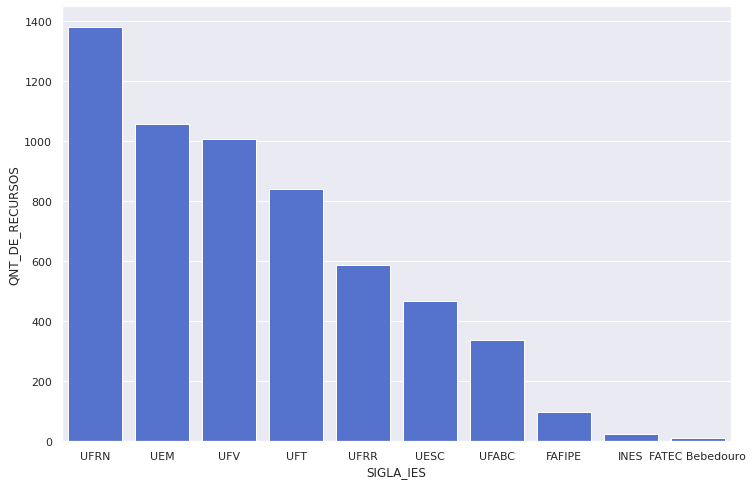

In [77]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data=top_10, x='SIGLA_IES', y = 'QNT_DE_RECURSOS', color='royalblue').figure.savefig('figura_6.png')

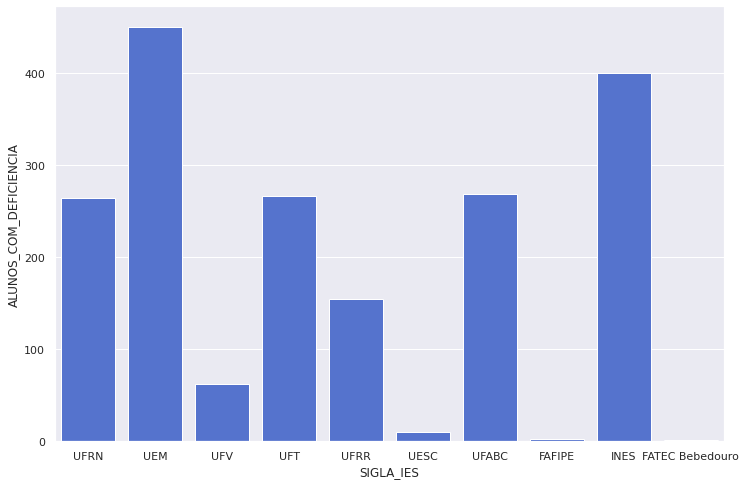

In [78]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data=top_10, x='SIGLA_IES', y = 'ALUNOS_COM_DEFICIENCIA', color='royalblue').figure.savefig('figura_7.png')

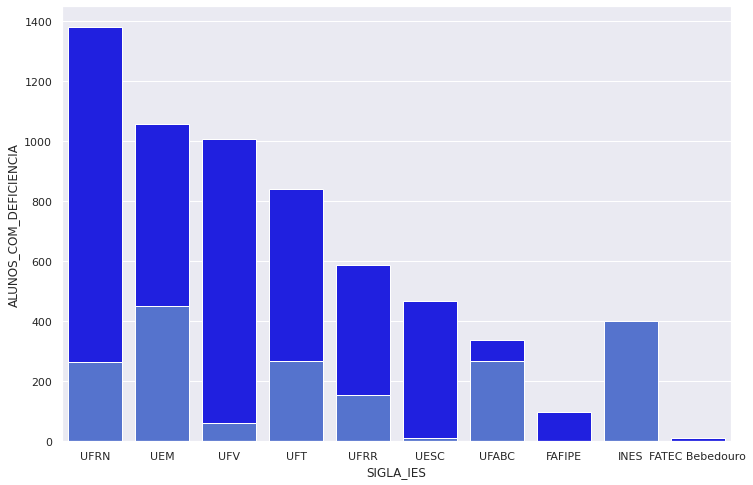

In [79]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data=top_10, x='SIGLA_IES', y = 'QNT_DE_RECURSOS', color='blue').figure.savefig('figura_8.png')
sns.barplot(data=top_10, x='SIGLA_IES', y = 'ALUNOS_COM_DEFICIENCIA', color='royalblue').figure.savefig('figura_9.png')

#Análise por grande área de formação
(falta fazer)

In [83]:
df_cursos_por_recursos.head()
#esse dataframe não seria recursos por IES não? 

,NOME_IES,SIGLA_IES,QNT_DE_CURSOS,QNT_DE_RECURSOS,ALUNOS_COM_DEFICIENCIA,MEDIA_RECURSOS
0,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,114,164.0,333,1.438596
1,UNIVERSIDADE DE BRASÍLIA,UNB,149,1785.0,195,11.979866
2,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,116,327.0,449,2.818966
3,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,107,105.0,239,0.981308
4,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,55,607.0,134,11.036364


#Análise do Perfil do Aluno

In [92]:
perfil_aluno = pd.read_csv('tabela_aluno.csv', sep=';')
perfil_aluno.head()

,ID_ALUNO,CODIGO_IES,RACA,PAIS_ORIGEM,GENERO,IDADE
0,1,1,Parda,Brasil,Masculino,32
1,2,1,Parda,Brasil,Feminino,39
2,3,1,Parda,Brasil,Masculino,43
3,4,1,Parda,Brasil,Feminino,37
4,5,1,Parda,Brasil,Masculino,29


<Figure size 720x1440 with 0 Axes>

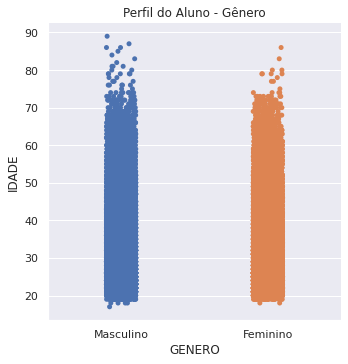

In [116]:
#Gráfico categórico Catplot
plt.pyplot.figure(figsize=(10,20))
aluno_genero = sns.catplot(x='GENERO', y='IDADE', data=perfil_aluno)
plt.pyplot.title('Perfil do Aluno - Gênero')
#plt.pyplot.savefig('perfil_genero.png', dpi=300, orientation = 'horizontal')
plt.pyplot.show()

<Figure size 720x1440 with 0 Axes>

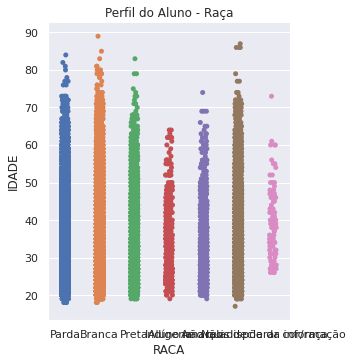

In [117]:
#Gráfico categórico Catplot
plt.pyplot.figure(figsize=(10,20))
aluno_raca = sns.catplot(x='RACA', y='IDADE', data=perfil_aluno, hue='RACA')
plt.pyplot.title('Perfil do Aluno - Raça')
#plt.pyplot.savefig('perfil_raca.png', dpi=300, orientation = 'horizontal')
plt.pyplot.show()

#Precisa melhorar o gráfico! Adicionar legenda?